In July 2022, I discovered [this cool map](https://tjukanovt.github.io/notable-people) showing the single most notable man (rarely a woman) born in each city in the world. It had been based on a funny paper [A cross-verified database of notable people, 3500BC-2018AD](https://www.nature.com/articles/s41597-022-01369-4), or specifically on the attached dataset that can be [downloaded for further experiments](https://medialab.github.io/bhht-datascape/). So here are my experiments.

In [1]:
import pandas as pd
whoiswho = pd.read_csv("cross-verified-database.csv", encoding='utf-8')

In [2]:
whoiswho.shape

(2291817, 48)

In [3]:
whoiswho.columns

Index(['wikidata_code', 'birth', 'death', 'approx_birth', 'approx_death',
       'birth_min', 'birth_max', 'death_min', 'death_max', 'gender',
       'level1_main_occ', 'name', 'un_subregion', 'birth_estimation',
       'death_estimation', 'bigperiod_birth_graph_b',
       'bigperiod_death_graph_b', 'curid', 'level2_main_occ', 'freq_main_occ',
       'freq_second_occ', 'level2_second_occ', 'level3_main_occ',
       'bigperiod_birth', 'bigperiod_death', 'wiki_readers_2015_2018',
       'non_missing_score', 'total_count_words_b', 'number_wiki_editions',
       'total_noccur_links_b', 'sum_visib_ln_5criteria',
       'ranking_visib_5criteria', 'all_geography_groups',
       'string_citizenship_raw_d', 'citizenship_1_b', 'citizenship_2_b',
       'list_areas_of_rattach', 'area1_of_rattachment', 'area2_of_rattachment',
       'list_wikipedia_editions', 'un_region', 'group_wikipedia_editions',
       'bplo1', 'dplo1', 'bpla1', 'dpla1', 'pantheon_1', 'level3_all_occ'],
      dtype='object')

How do you measure how notable someone is? The authors of the [A cross-verified database of notable people, 3500BC-2018AD](https://www.nature.com/articles/s41597-022-01369-4) paper suggest this:

> ### Measuring notability  
Many individuals have low visibility and sparse information. To disentangle the most visible from the less visible, we build a synthetic notability index using five dimensions to figure out a ranking for this broader set of individuals. These dimensions are:  
> 1. the number of Wikipedia editions of each individual;  
> 2. the length, i.e total number of words found in all available biographies. It is equal to zero for individuals with just one > Wikidata entry and no biography in Wikipedia;  
> 3. the average number of biography views (hits) for each individual between 2015 and 2018 in all available language editions, using an API available in https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews or zero in the absence of a Wikipedia biography;  
> 4. the number of non-missing items retrieved from Wikipedia or Wikidata for birth date, gender and domain of influence. The intuition here is that the more notable the individual, the more documented his/her biographies will be;  
> 5. the total number of external links (sources, references, etc.) from Wikidata.

This looks scientific AF, however as we're going to see, using Wikipedia and the Wiki universe as a proxy for notability has some serious flaws.

<AxesSubplot:xlabel='birth'>

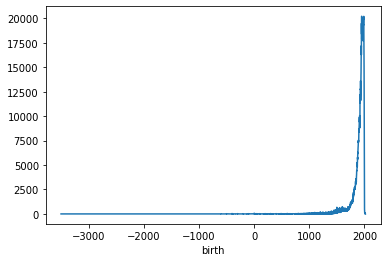

In [4]:
whoiswho.groupby("birth")["name"].nunique().plot()

<AxesSubplot:xlabel='birth'>

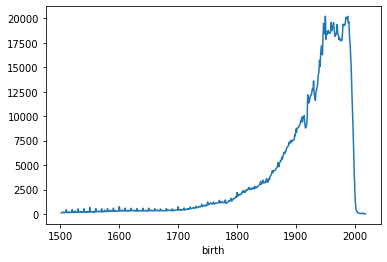

In [5]:
whoiswho[whoiswho["birth"] > 1500].groupby("birth")["name"].nunique().plot()

In [6]:
pd.DataFrame(whoiswho.groupby("bigperiod_birth")["name"].nunique())

,name
bigperiod_birth,
1.Ancient History Before 500AD,5062
2.Post-Classical History 501-1500AD,31249
3.Early Modern Period 1501-1750AD,92447
4.Mid Modern Period 1751-1900AD,479922
5.Contemporary period 1901-2020AD,1481790
Missing,195348


*First bias*: towards living and recently deceased people.

In [7]:
pd.DataFrame(whoiswho.groupby("gender")["name"].nunique())

,name
gender,
Female,387105
Male,1893086
Other,609


*Second bias*: towards men, in a 5:1 ratio.

In [8]:
pd.DataFrame(whoiswho.groupby("area1_of_rattachment")["name"].nunique().nlargest(10))

,name
area1_of_rattachment,
US,402026
United_Kingdom,213774
France,148312
Old_(before_year_1990_AD)_Germany,135172
Germany,125791
Italy,80853
Sweden,73087
Canada,66126
Spain,57919


In [9]:
pd.DataFrame(whoiswho.groupby("un_region")["name"].nunique().nlargest(30))

,name
un_region,
Europe,1243795
America,624702
Asia,214823
Oceania,81121
Africa,67134


In [10]:
pd.DataFrame(whoiswho.groupby("un_subregion")["name"].nunique().nlargest(30))

,name
un_subregion,
Western Europe,777703
Northern America,474249
Southern Europe,222133
Northern Europe,137963
South America,108087
Eastern Europe,106634
Oceania Western World,79087
Eastern Asia,72510
South Asia incl. Indian Peninsula,63537


*Third bias*: towards Western Europe and North America. Or: against POC and Slavs.

In [11]:
pd.DataFrame(whoiswho.groupby("level2_main_occ")["name"].nunique().nlargest(30))

,name
level2_main_occ,
Sports/Games,633601
Culture-core,603504
Politics,314449
Academia,249159
Culture-periphery,97679
Administration/Law,76876
Religious,72349
Military,71559
Corporate/Executive/Business (large),46259


*Fourth bias*: towards sport professionals. (I guess this is because they generate so much data and stats, the kind of content that is easiest to add to Wiki pages, regardless the language.)

## But this doesn't mean the dataset is useless!

We're going to have a lot of fun playin' with it. Prepare for [wikidiving](https://www.urbandictionary.com/define.php?term=Wikidiving) on steroids. We just have to keep in mind that it has some biases and structural flaws, mimicking the biases and flaws of our societies.

Also, if you don't appreciate sportspeople, you can just != them.